In [17]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 31.6/235.7 GB disk)


In [18]:
from ultralytics import YOLO

from IPython.display import display, Image

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!unzip /content/drive/MyDrive/Fire/Fire.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/labels/IMG_4213-1-_jpeg_jpg.rf.bac4d55f602c2965c744dc5cd67190b5.txt  
  inflating: /content/dataset/train/labels/IMG_4214-1-_jpeg_jpg.rf.0b3bd23a863255fa7f35e7c08b267728.txt  
  inflating: /content/dataset/train/labels/IMG_4214-1-_jpeg_jpg.rf.5d80cc78b05f35fb2df88676f8d941f3.txt  
  inflating: /content/dataset/train/labels/IMG_4214-1-_jpeg_jpg.rf.82b966db5d8282257ee5bdad6a0147aa.txt  
  inflating: /content/dataset/train/labels/IMG_4215-1-_jpeg_jpg.rf.39b41f95c8f84559d03dc4568fcbf971.txt  
  inflating: /content/dataset/train/labels/IMG_4215-1-_jpeg_jpg.rf.b283efa2cfeed3a31201ec5684215ff5.txt  
  inflating: /content/dataset/train/labels/IMG_4215-1-_jpeg_jpg.rf.dc48da4f133b3627e66a2882bbcbbccb.txt  
  inflating: /content/dataset/train/labels/IMG_4216-1-_jpeg_jpg.rf.591abf10df23d2cf8a406f230afcfdde.txt  
  inflating: /content/dataset/train/labels/IMG_4216-1-_jpeg_jpg.rf.86df06f348e0a42c9b4fefde1efed146.t

## Check images in the dataset

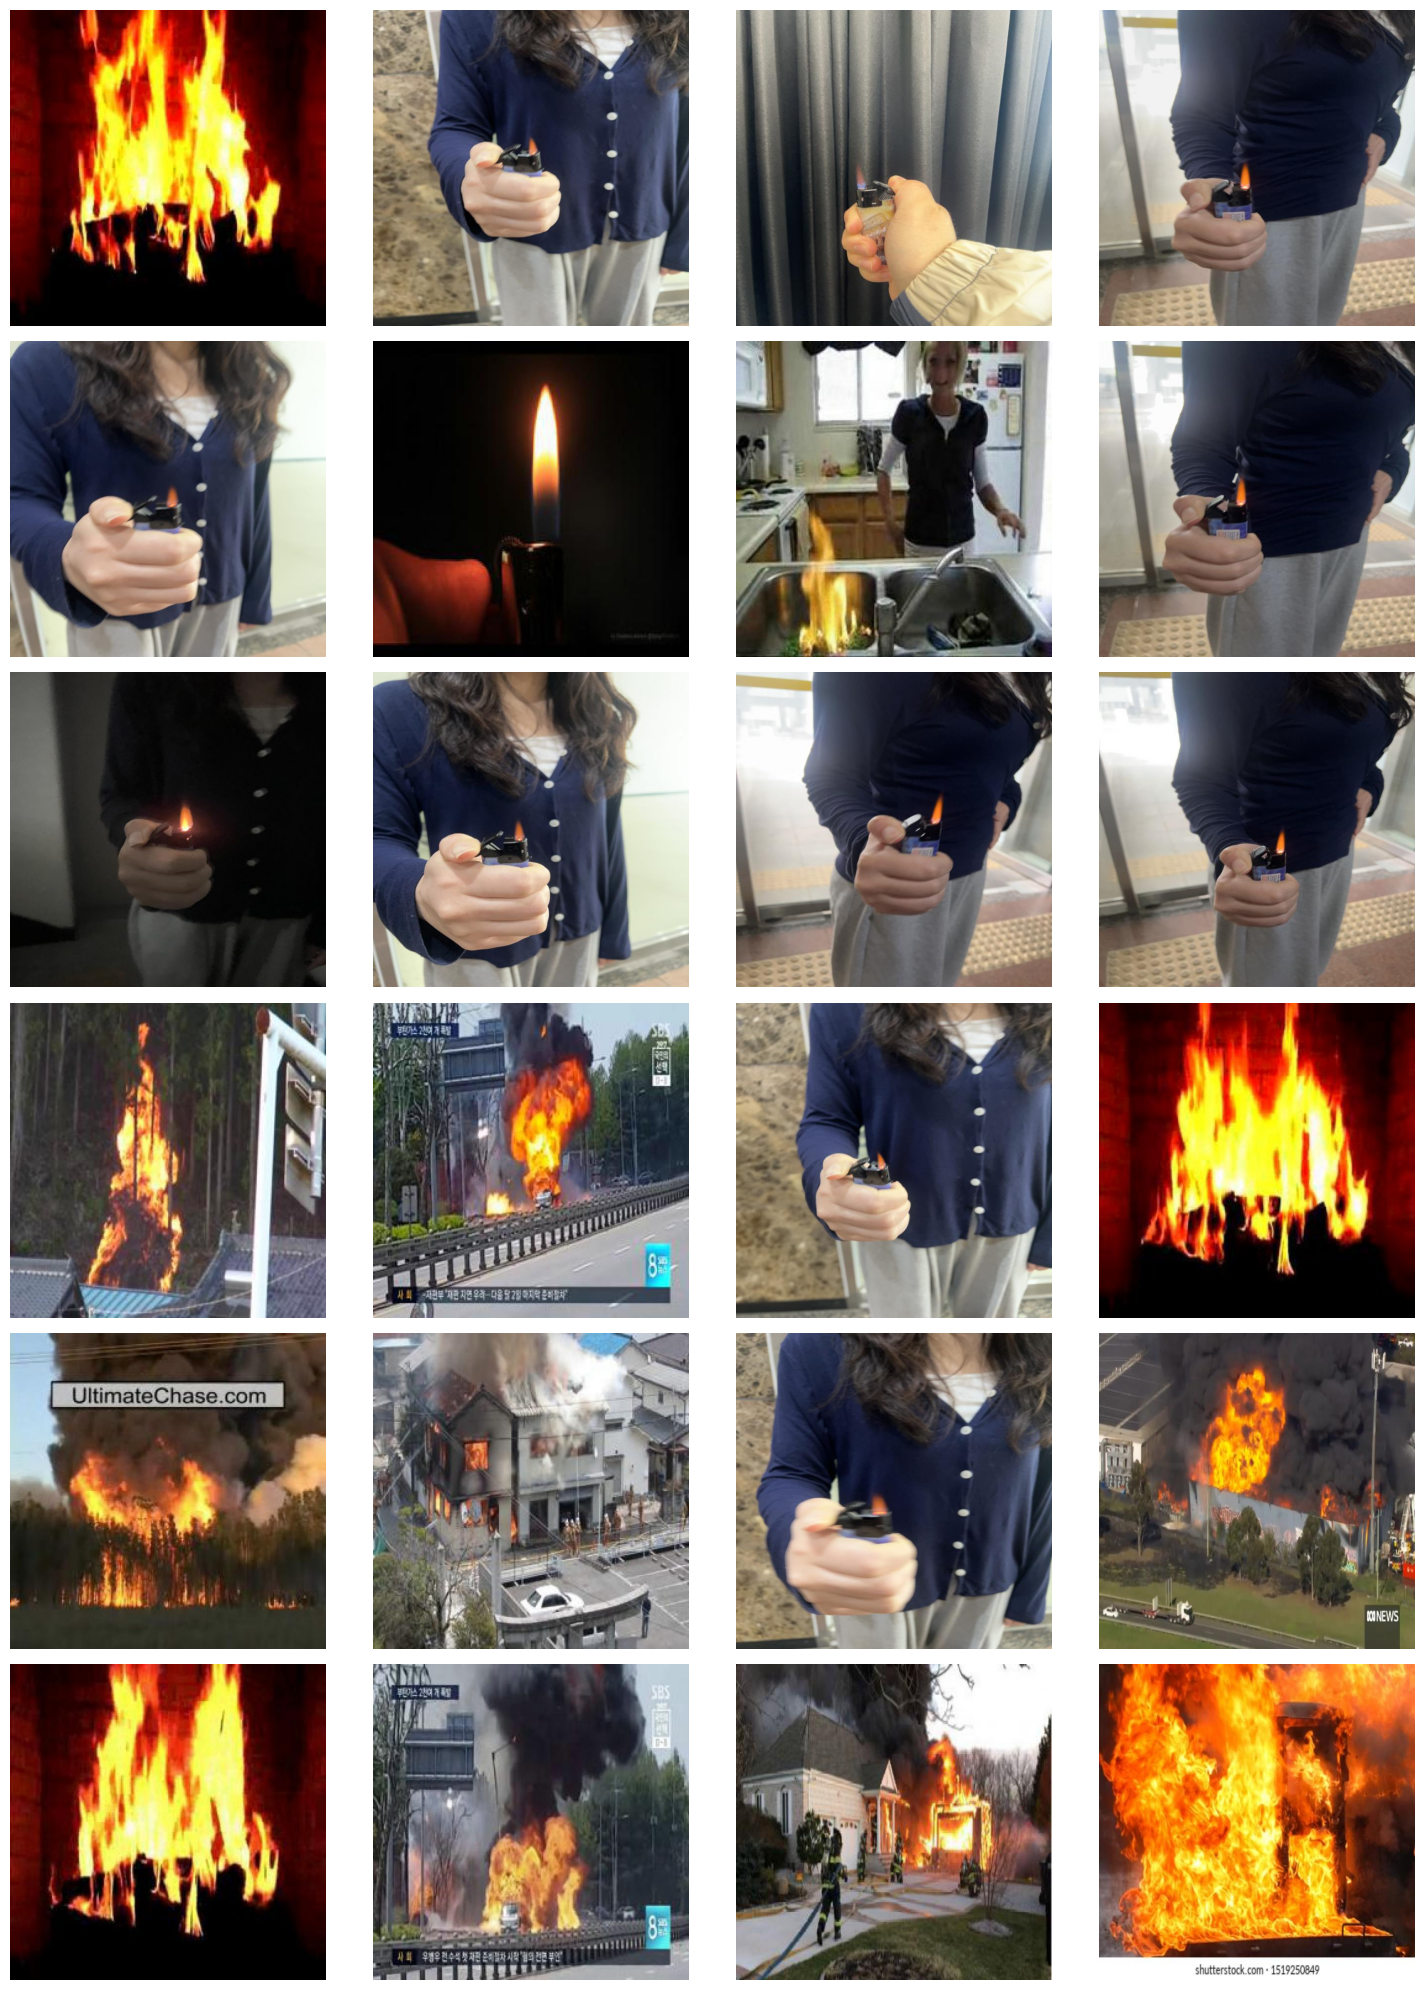

In [20]:
import matplotlib.pyplot as plt
import random
import os

image_folder = '/content/dataset/test/images'

# Get a list of image files
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Choose 24 random images (6x4 matrix)
num_images_to_display = 24
random_images = random.sample(image_files, min(num_images_to_display, len(image_files)))

# Create a 6x4 grid for the images
fig, axes = plt.subplots(6, 4, figsize=(15, 20))

# Iterate through the selected images and display them
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    image_path = os.path.join(image_folder, image_file)
    try:
        img = plt.imread(image_path)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')  # Turn off axis labels and ticks
    except Exception as e:
        print(f"Error displaying image {image_file}: {e}")

# Adjust layout and display
plt.tight_layout()
plt.show()


##Plot dataset distribution

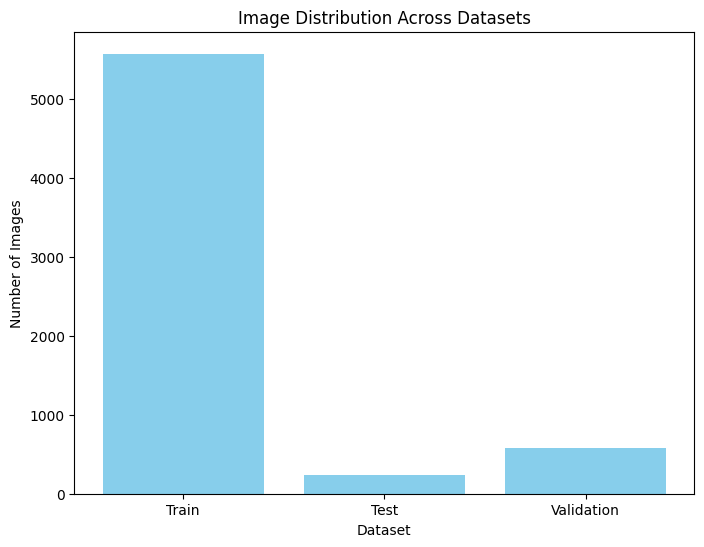

In [22]:
import matplotlib.pyplot as plt
import os

# Define paths to your image directories
train_dir = '/content/dataset/train/images'
test_dir = '/content/dataset/test/images'
valid_dir = '/content/dataset/valid/images'

# Function to count images in a directory
def count_images(directory):
  return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Count images in each directory
train_count = count_images(train_dir)
test_count = count_images(test_dir)
valid_count = count_images(valid_dir)

# Create the bar graph
categories = ['Train', 'Test', 'Validation']
counts = [train_count, test_count, valid_count]
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Image Distribution Across Datasets')
plt.show()

In [23]:
import os
import cv2
from pathlib import Path

# Paths for the dataset
dataset_path = "/content/dataset"  # Update this to your dataset path
images_path_train = os.path.join(dataset_path, "train", "images")
labels_path_train = os.path.join(dataset_path, "train", "labels")

# Parameters
fire_class_id = 0  # Class ID for "fire"

# Function to load images and annotations
def load_images_and_labels(images_path, labels_path):
    images = []
    labels = []
    image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg") or f.endswith(".png")]

    for img_file in image_files:
        # Corresponding label file
        label_file = img_file.replace(".jpg", ".txt").replace(".png", ".txt")
        label_path = os.path.join(labels_path, label_file)

        if os.path.exists(label_path):
            img = cv2.imread(os.path.join(images_path, img_file))
            labels_content = []

            with open(label_path, "r") as f:
                for line in f:
                    class_id, x_center, y_center, width, height = map(float, line.split())
                    if class_id == fire_class_id:  # Filter only "fire" class
                        labels_content.append([class_id, x_center, y_center, width, height])

            if labels_content:
                images.append(img)
                labels.append(labels_content)

    return images, labels

# Load the "fire" class images and labels
fire_images, fire_labels = load_images_and_labels(images_path_train, labels_path_train)

# Save processed images and labels
output_images_path = os.path.join(dataset_path, "train", "images", "processed")
output_labels_path = os.path.join(dataset_path, "train", "labels", "processed")
Path(output_images_path).mkdir(parents=True, exist_ok=True)
Path(output_labels_path).mkdir(parents=True, exist_ok=True)

# Saving the processed images and their corresponding labels
for i, img in enumerate(fire_images):
    processed_image_path = os.path.join(output_images_path, f"processed_{i}.jpg")
    processed_label_path = os.path.join(output_labels_path, f"processed_{i}.txt")

    cv2.imwrite(processed_image_path, img)

    with open(processed_label_path, "w") as label_file:
        for bbox in fire_labels[i]:
            class_id, x_center, y_center, width, height = bbox
            label_file.write(f"{int(class_id)} {x_center} {y_center} {width} {height}\n")

# Verify that the processed data is saved
print(f"Total processed 'fire' images: {len(fire_images)}")


Total processed 'fire' images: 5570


In [24]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/dataset/data.yaml epochs=25 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 23.3MB/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

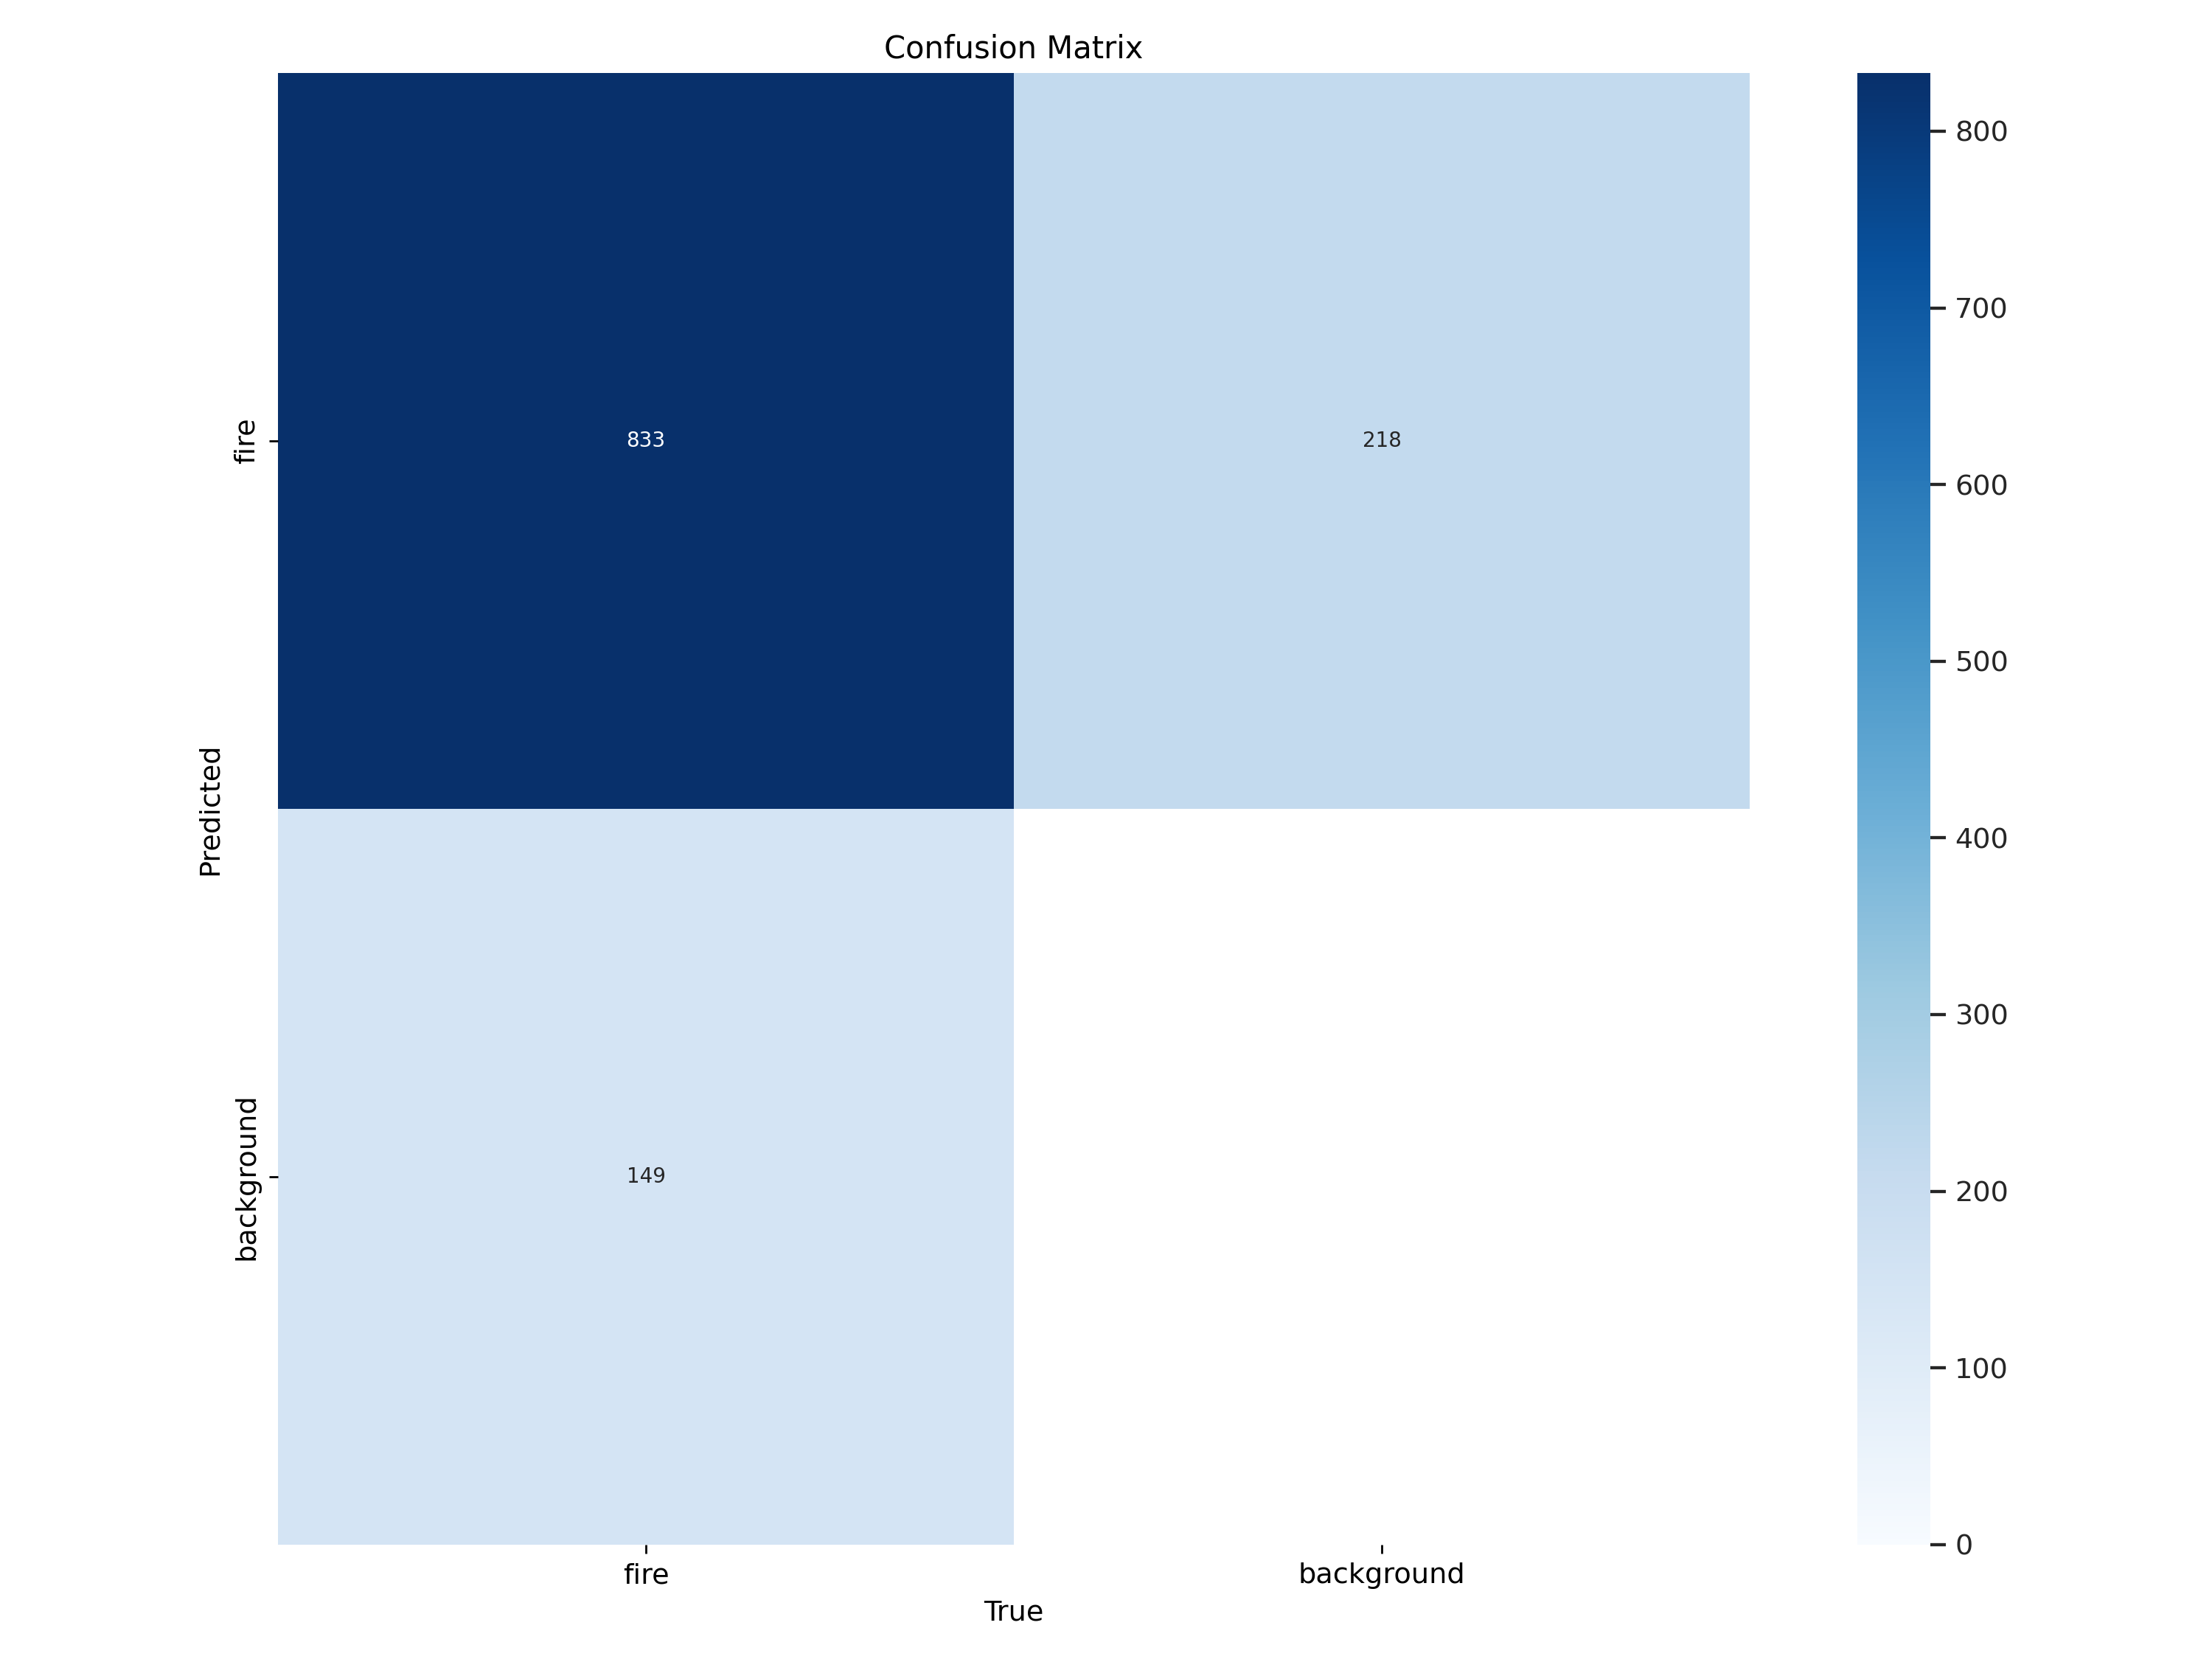

In [25]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

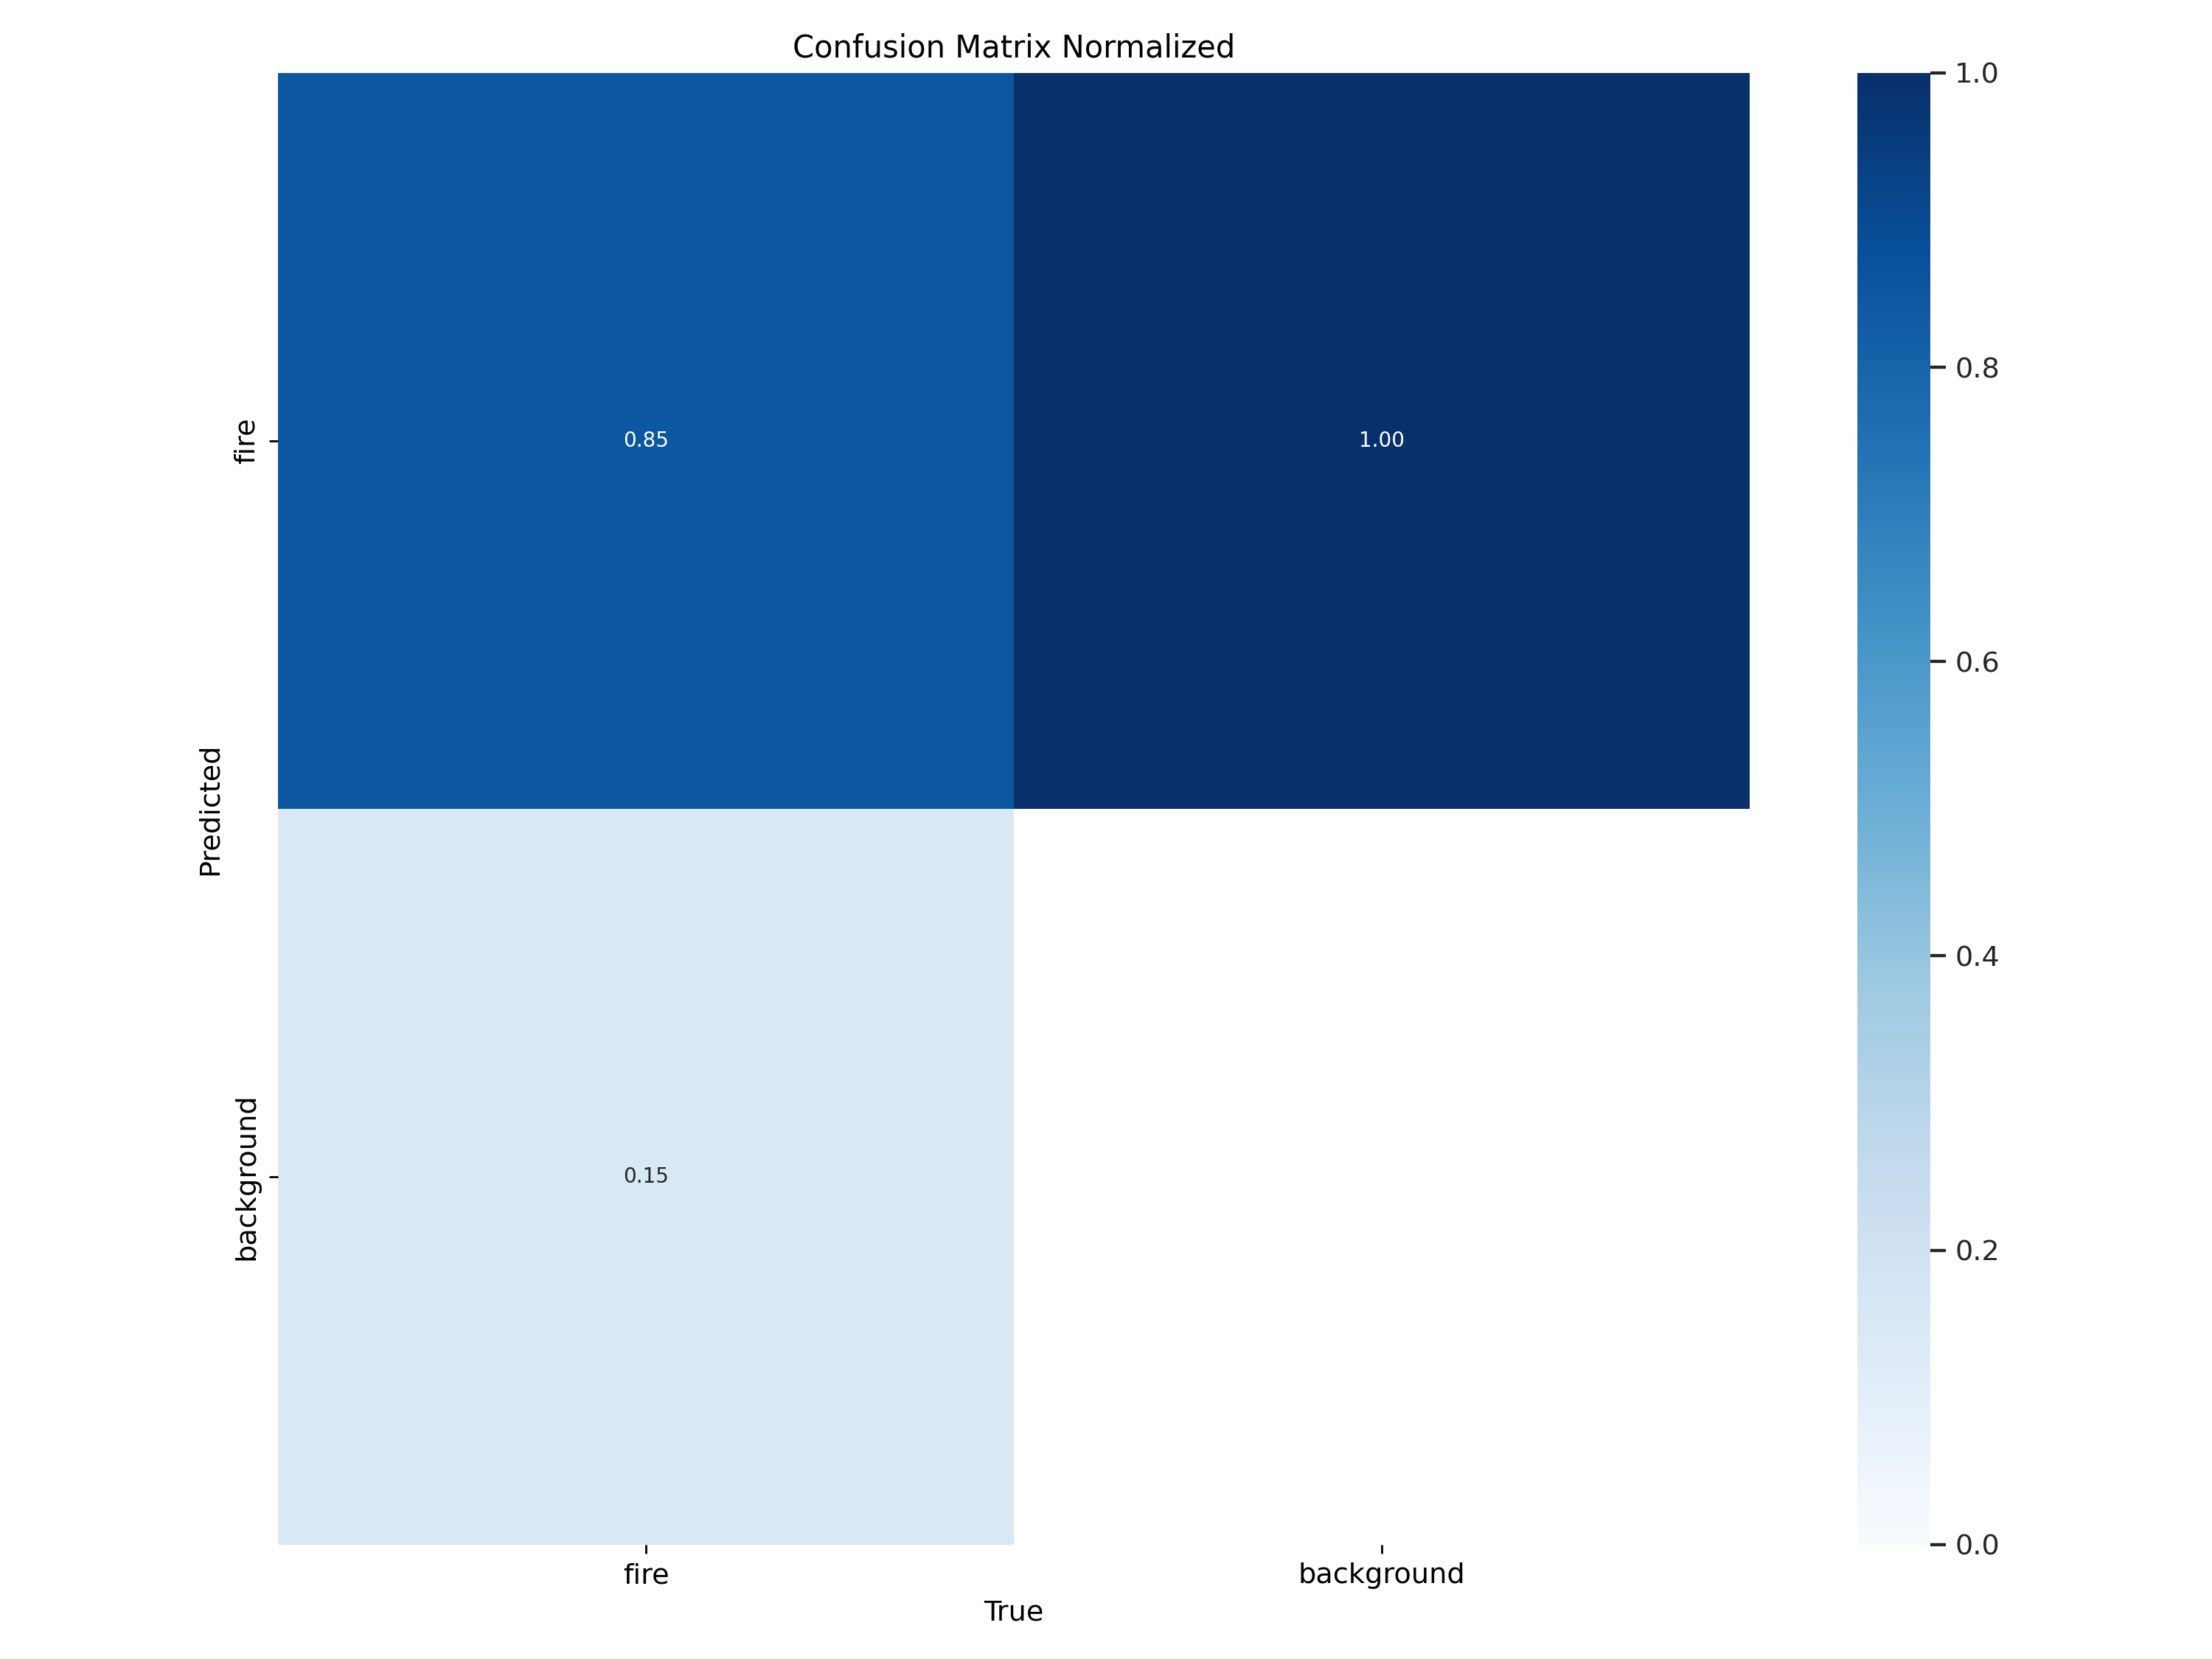

In [26]:
Image(filename='/content/runs/detect/train/confusion_matrix_normalized.png', width=600)

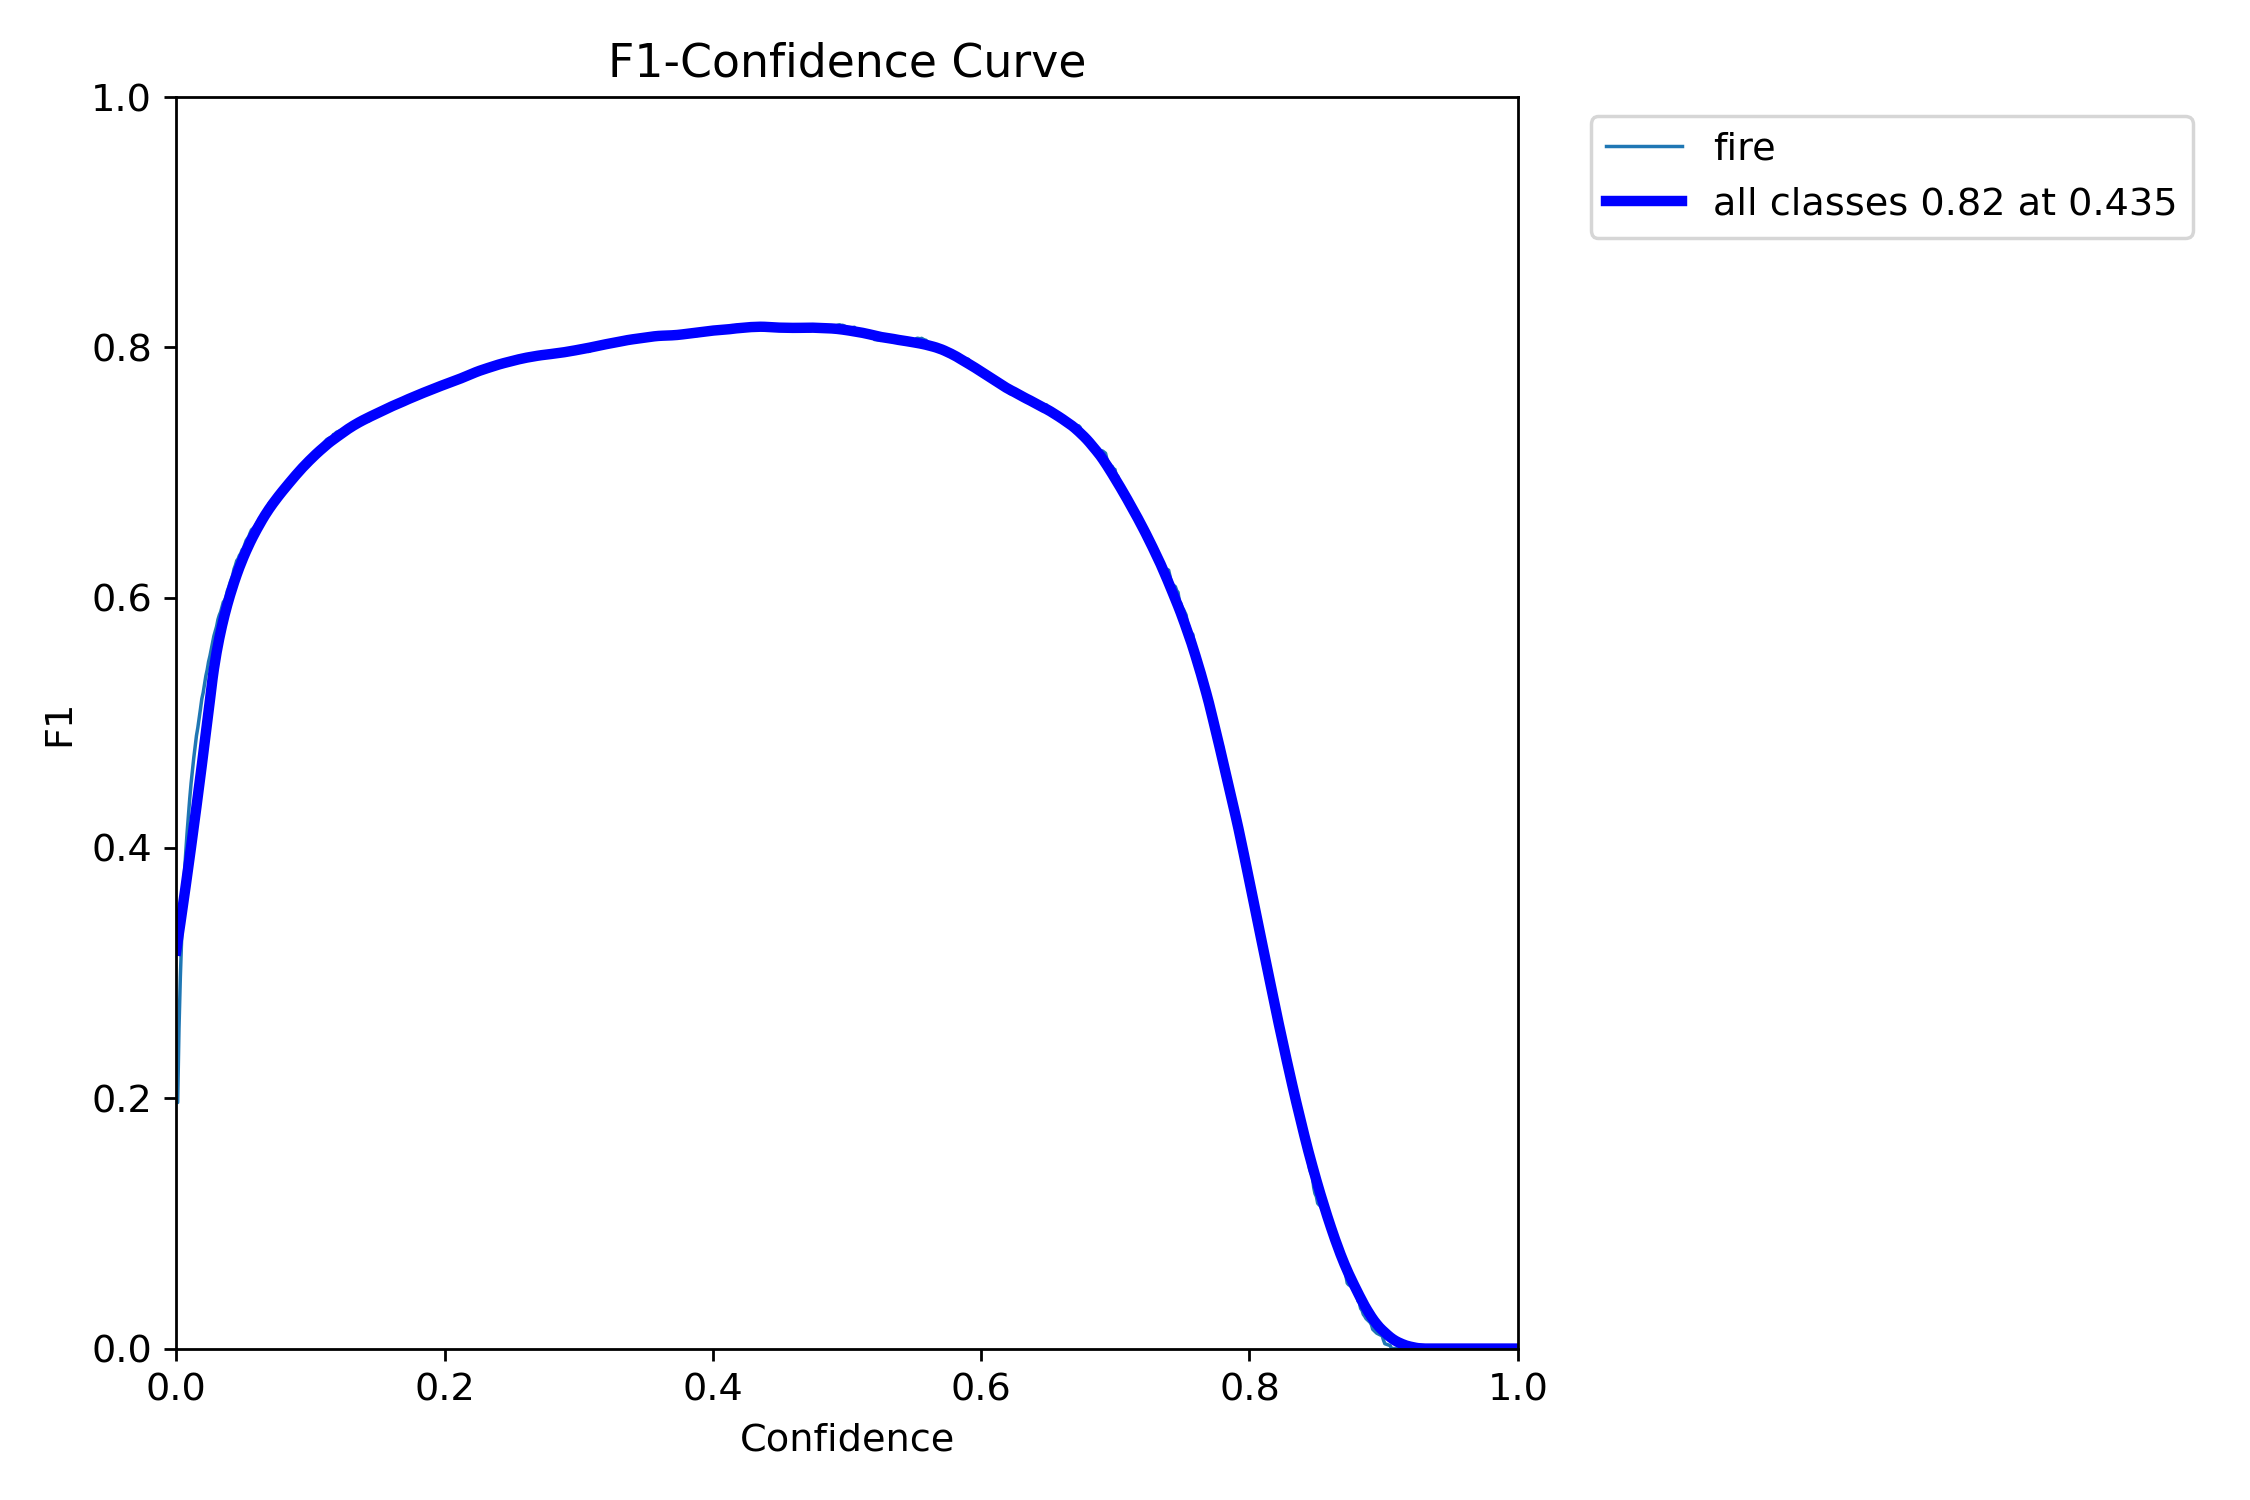

In [27]:
Image(filename='/content/runs/detect/train/F1_curve.png', width=600)

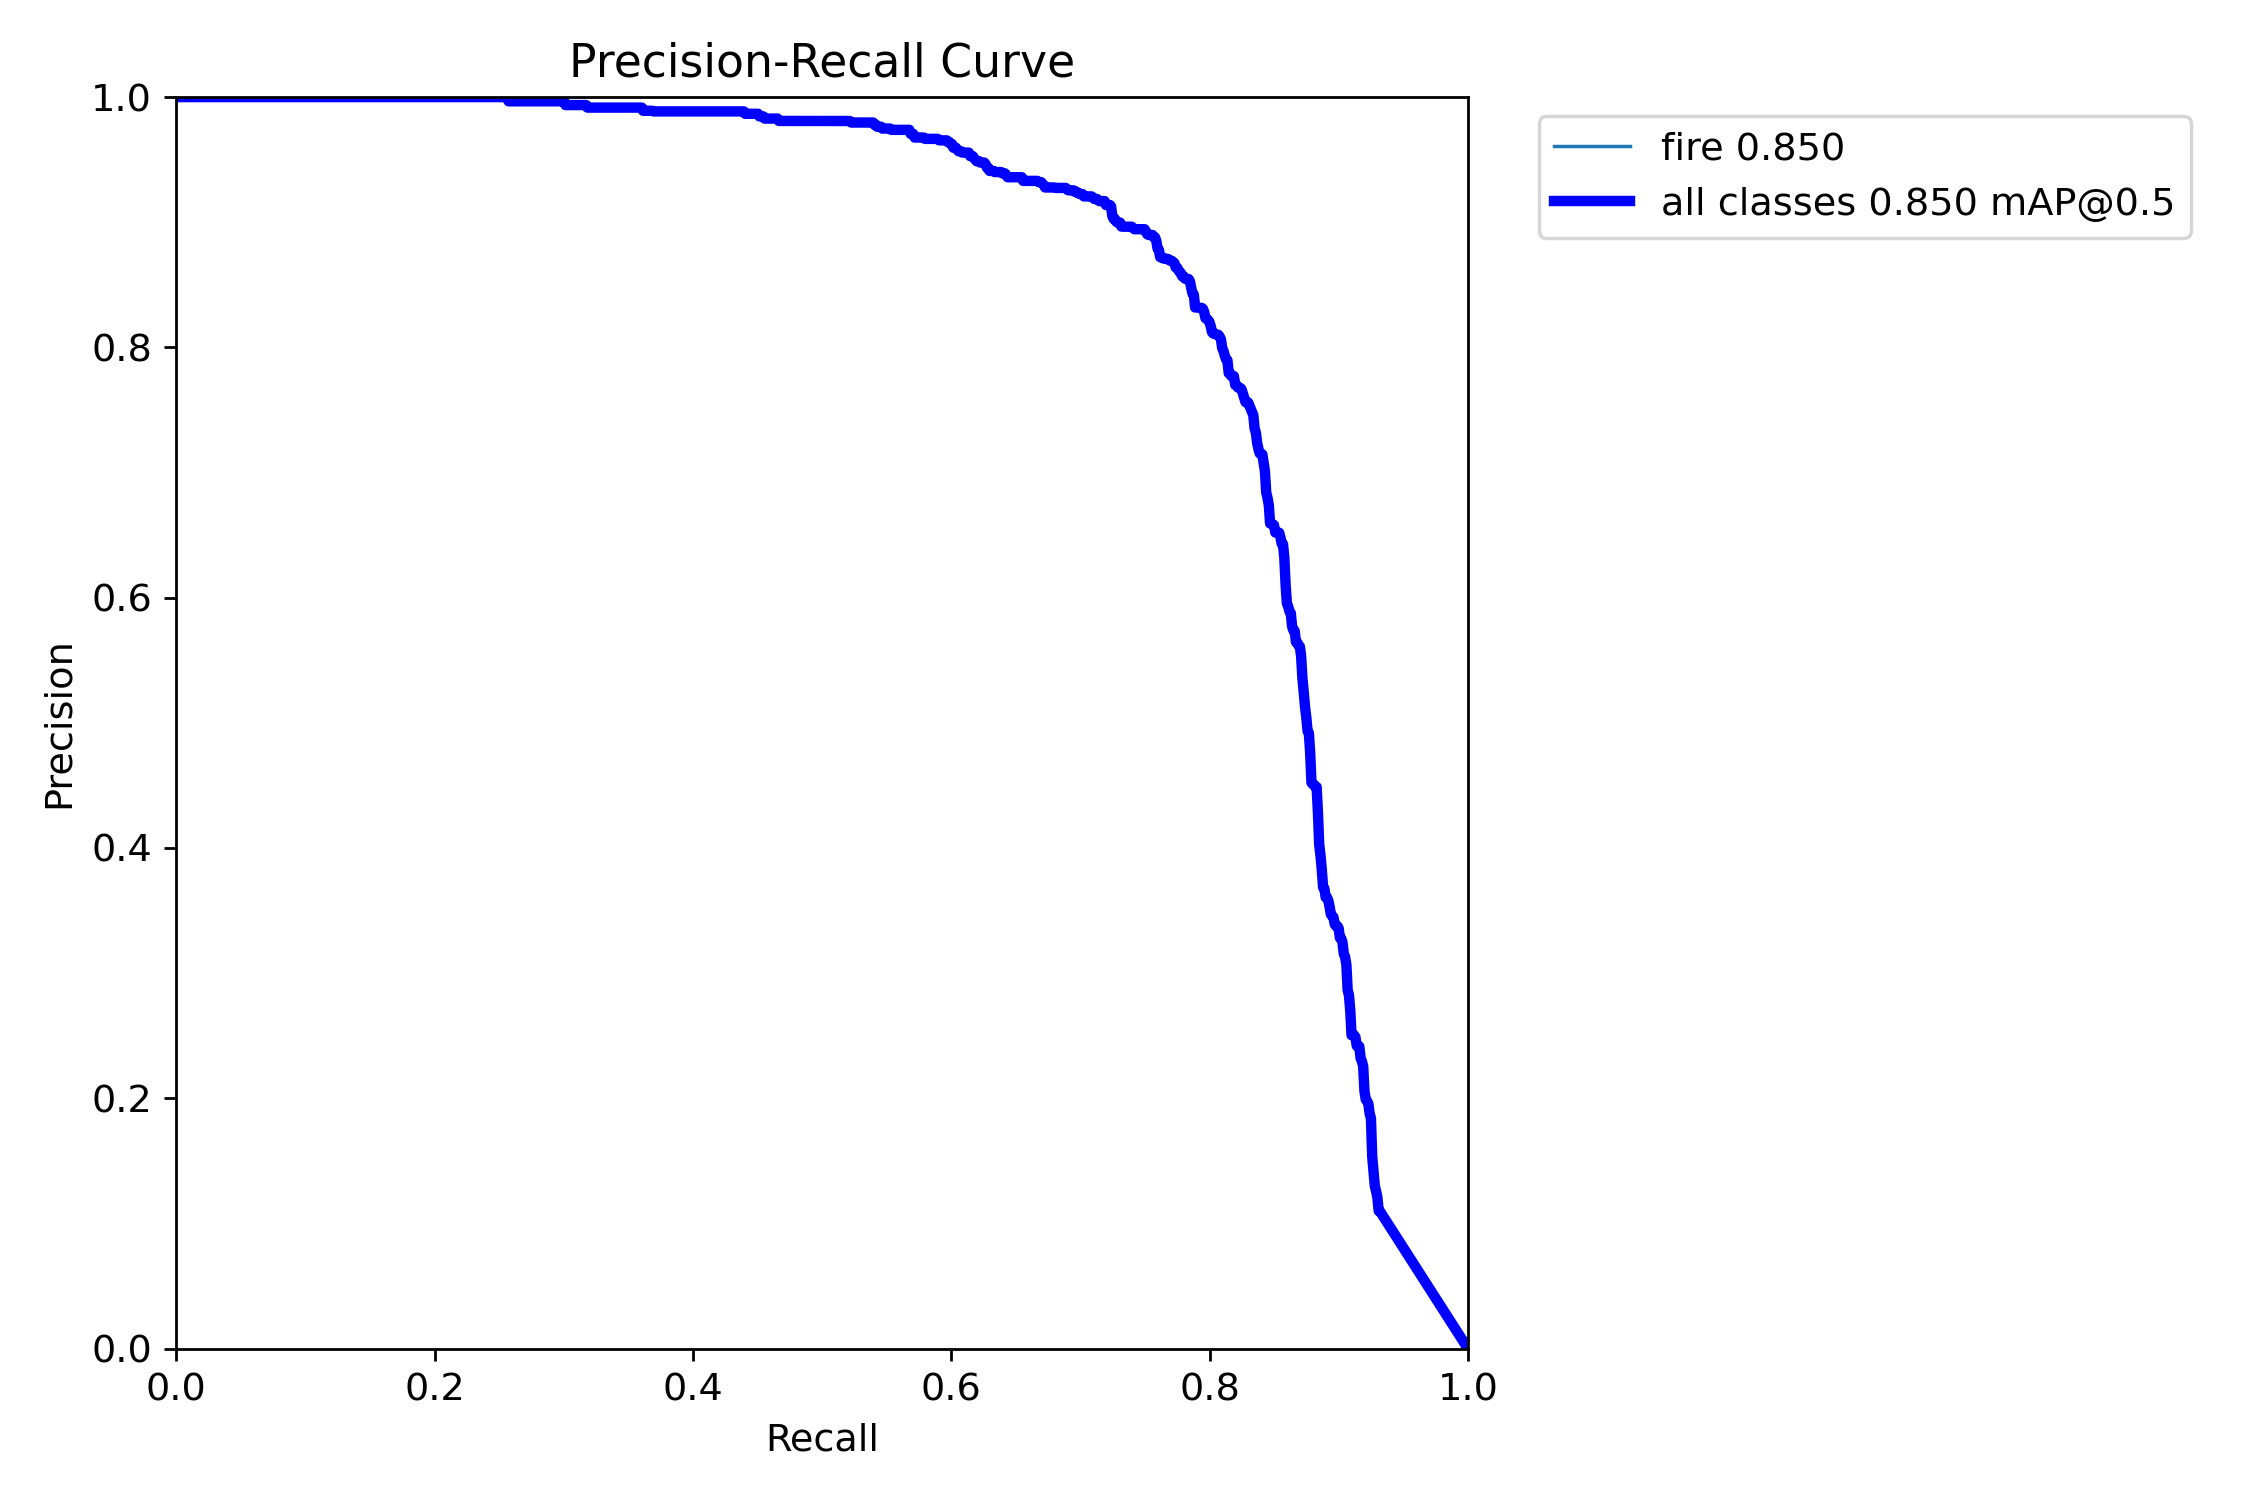

In [30]:
Image(filename='/content/runs/detect/train/PR_curve.png', width=600)

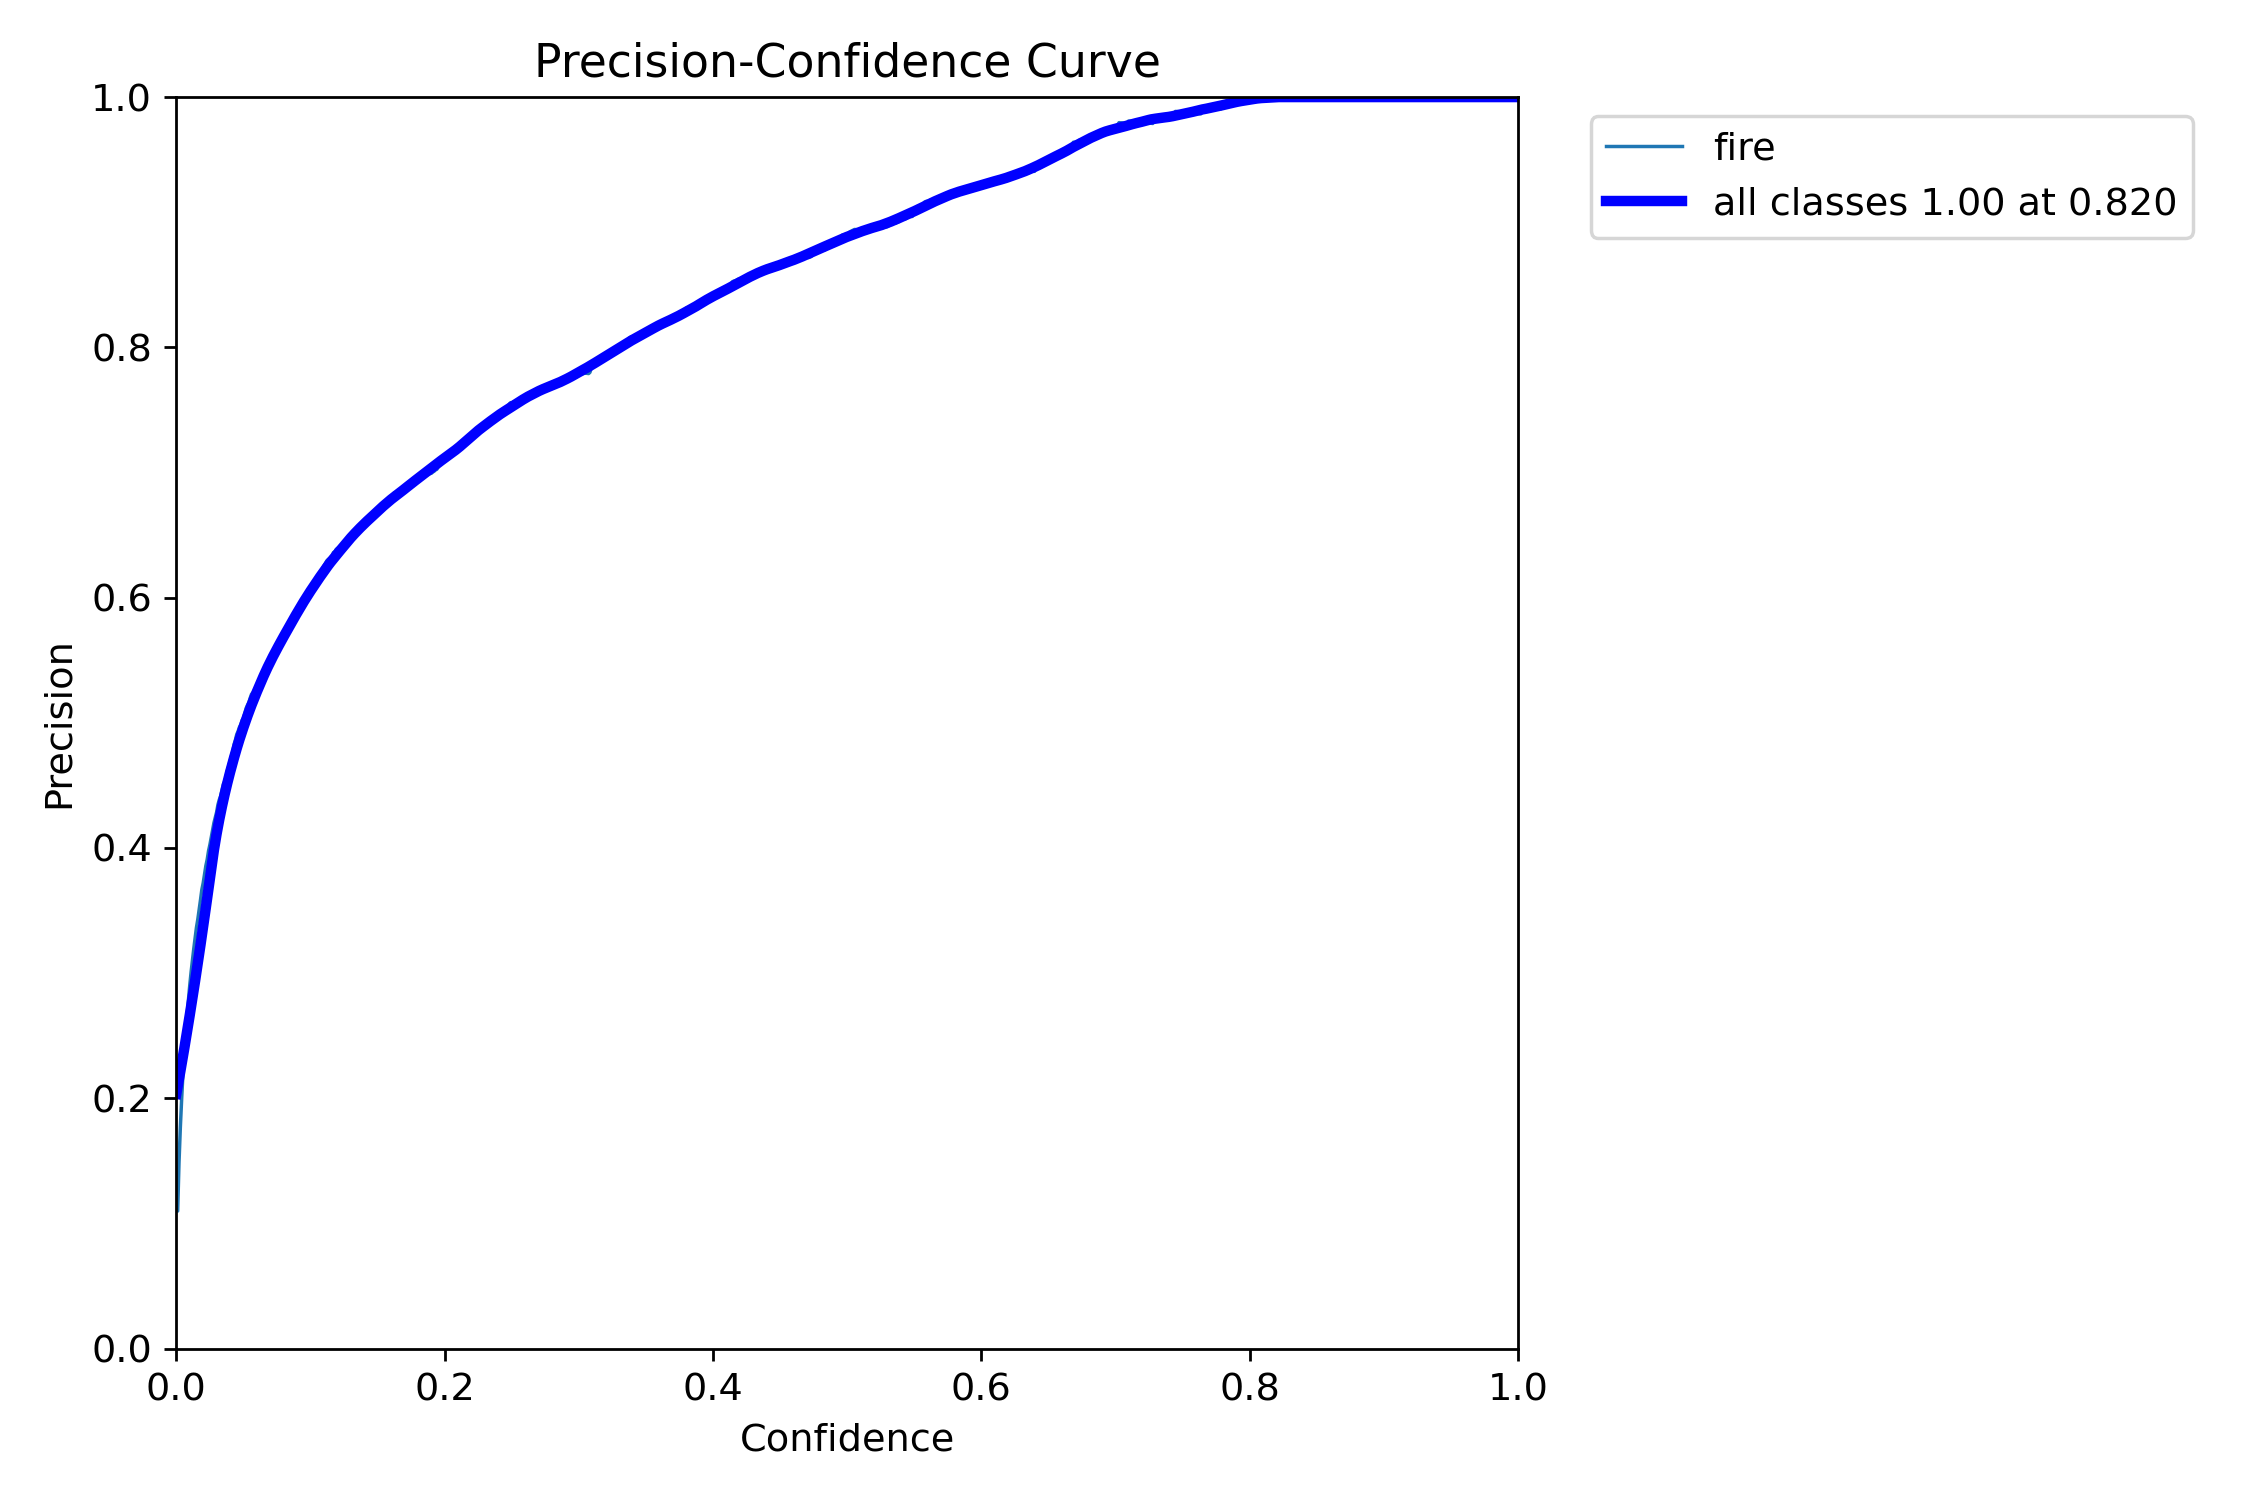

In [31]:
Image(filename='/content/runs/detect/train/P_curve.png', width=600)

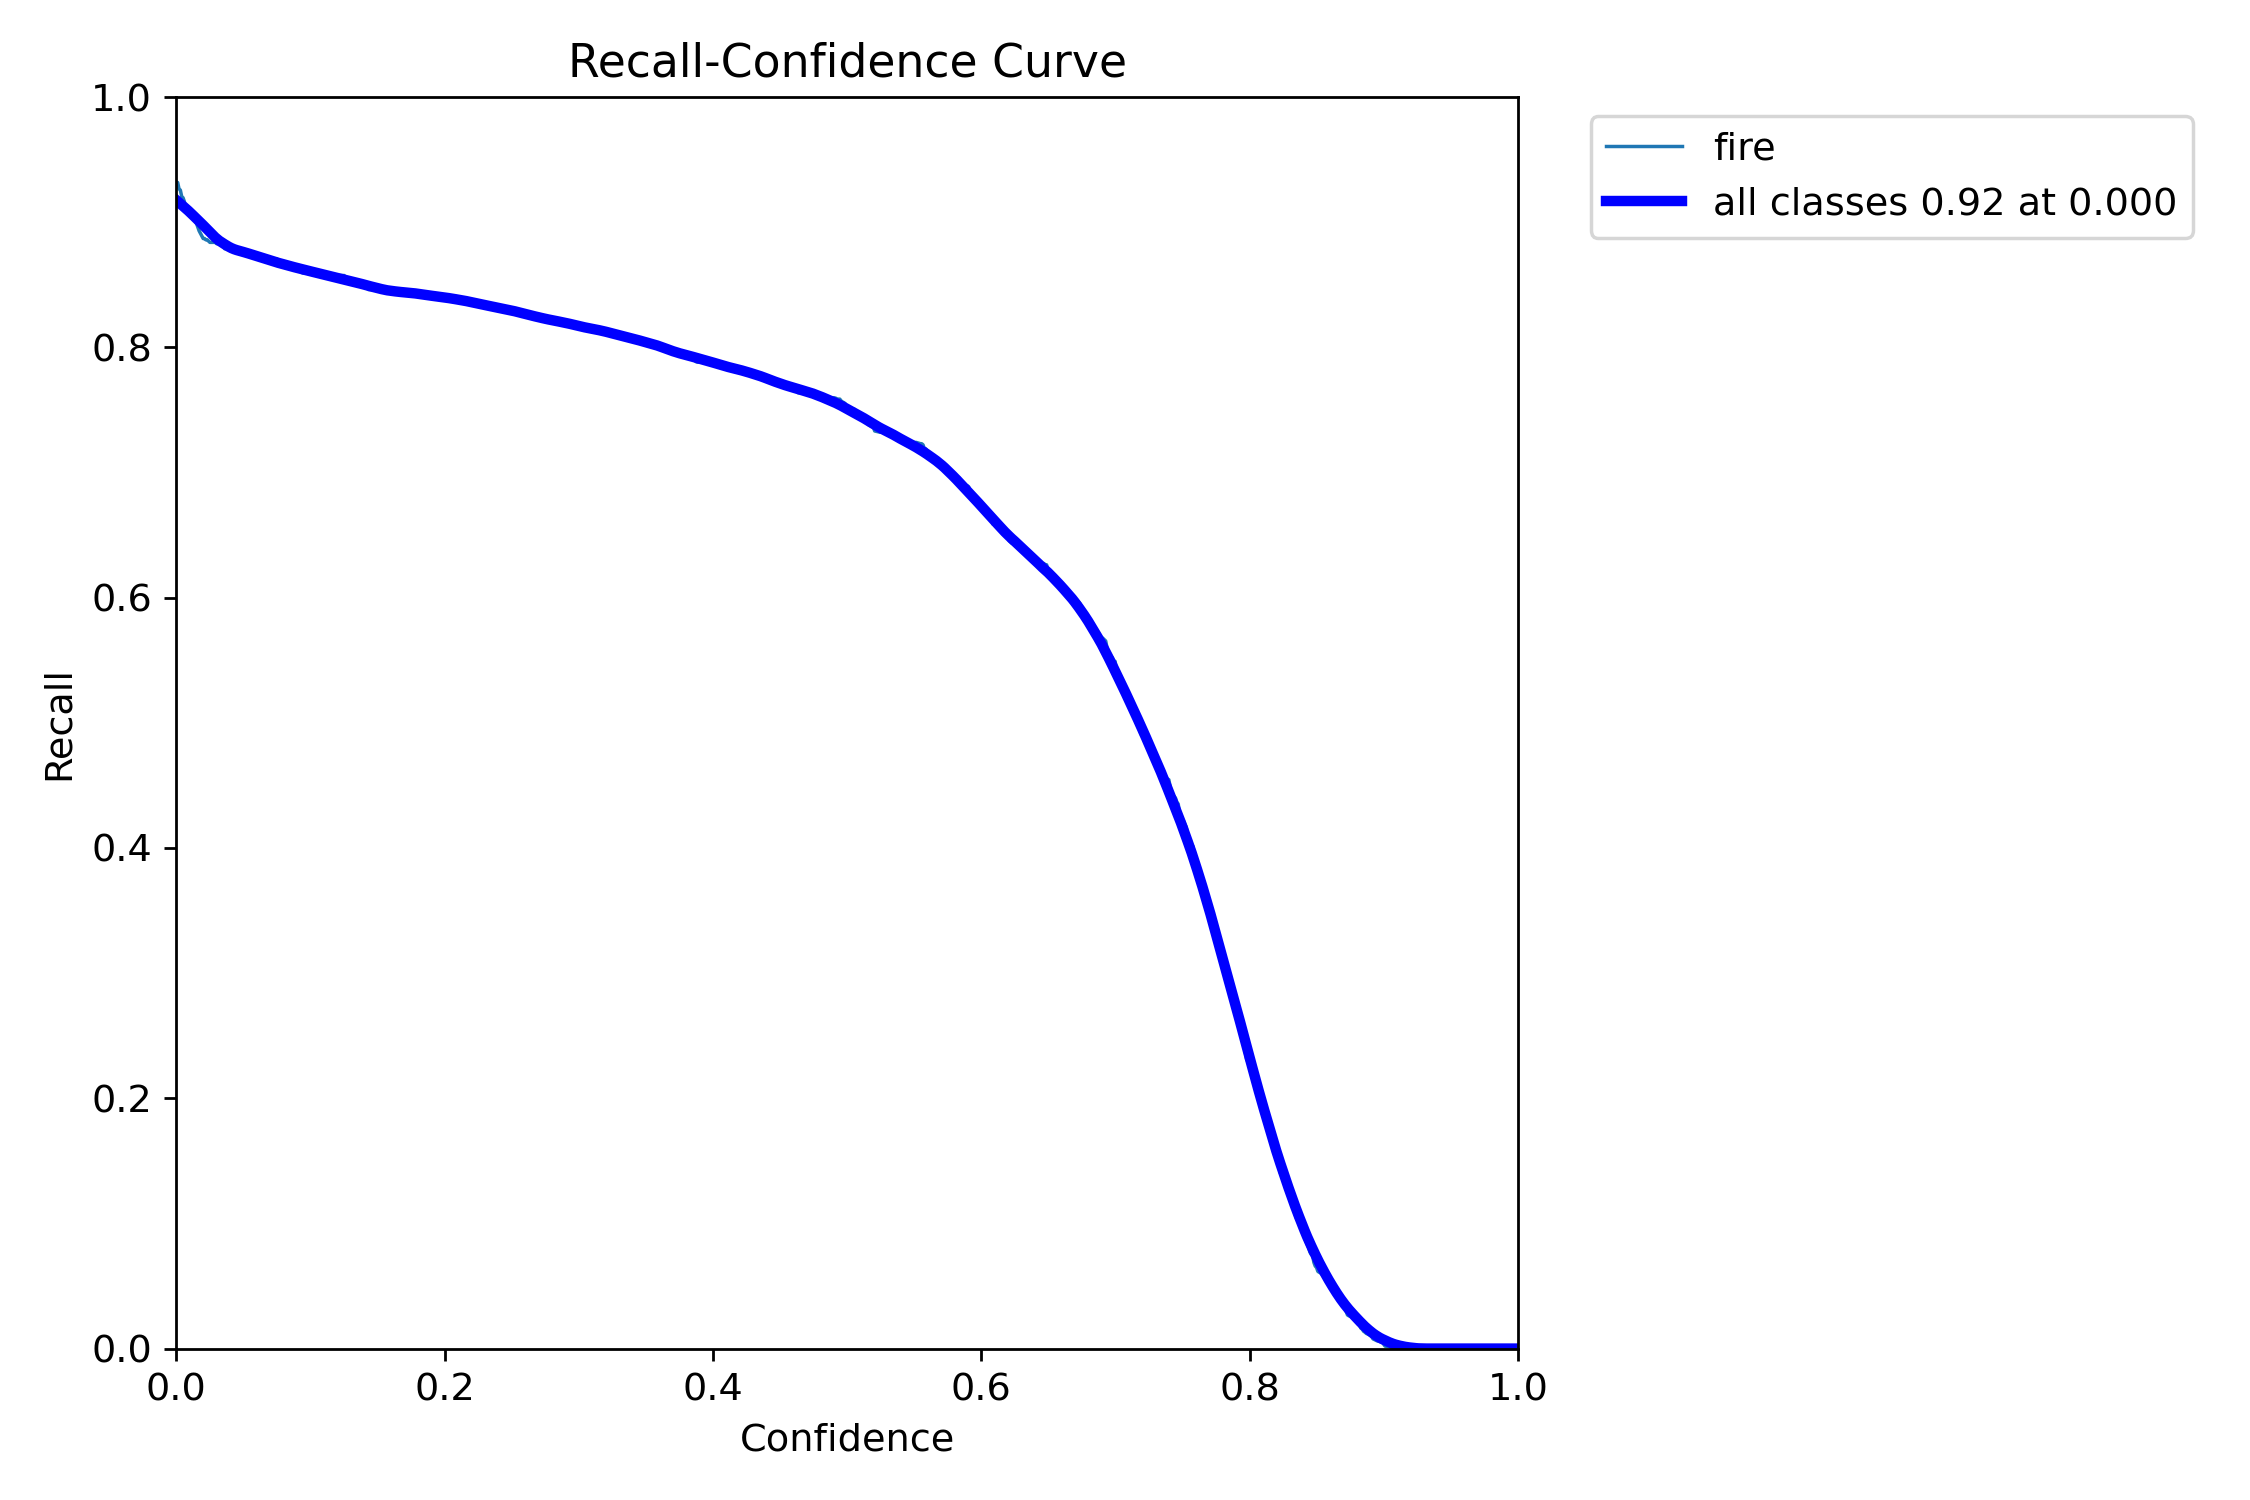

In [32]:
Image(filename='/content/runs/detect/train/R_curve.png', width=600)

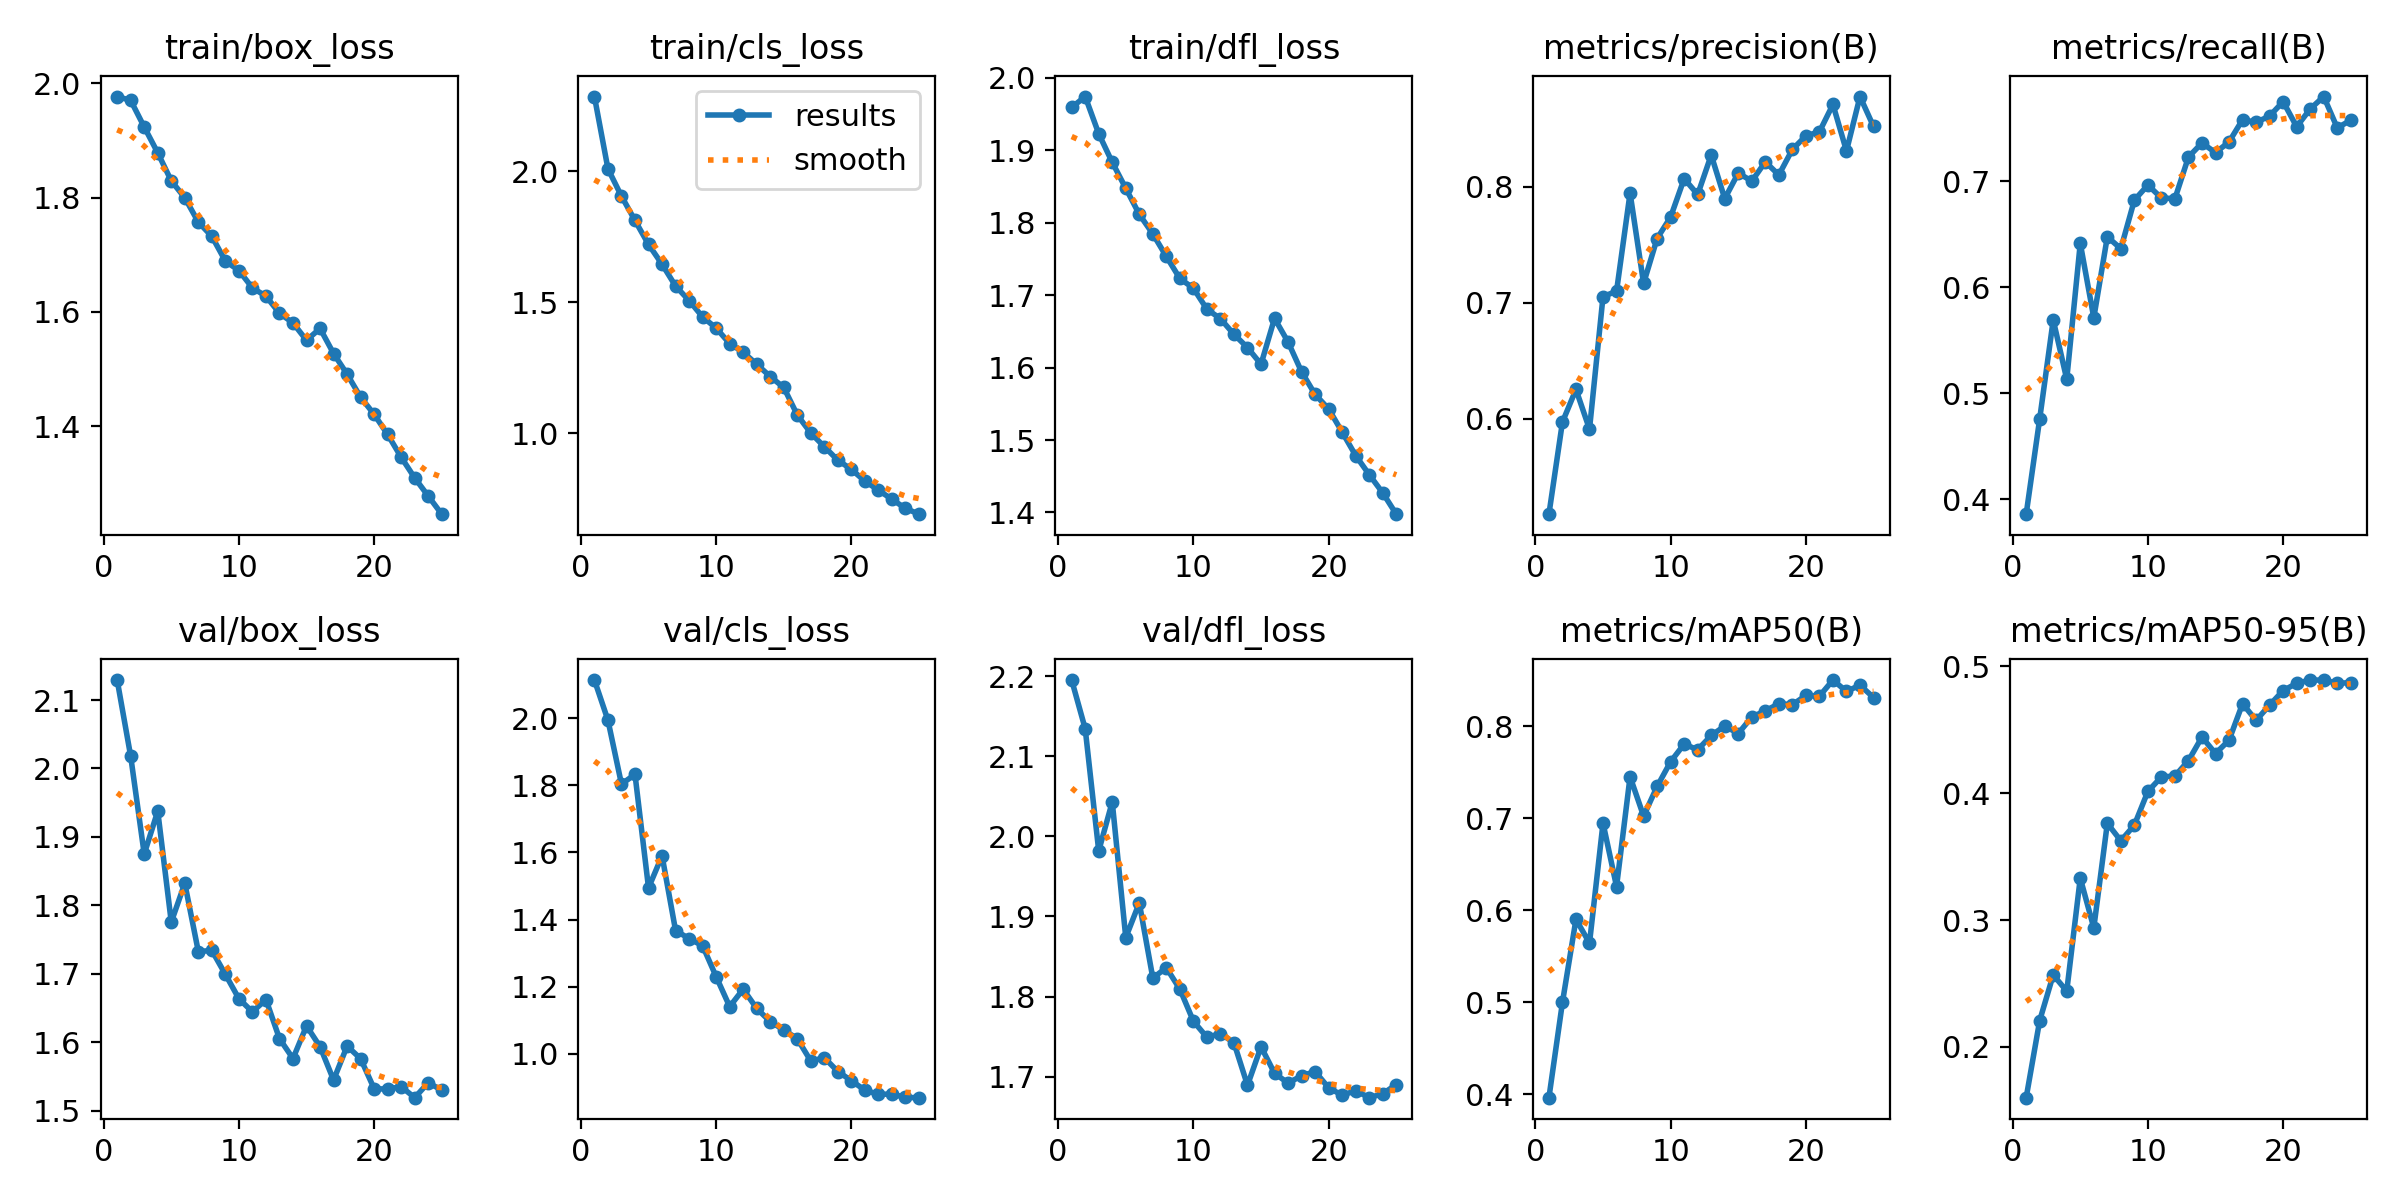

In [33]:
Image(filename='/content/runs/detect/train/results.png', width=600)

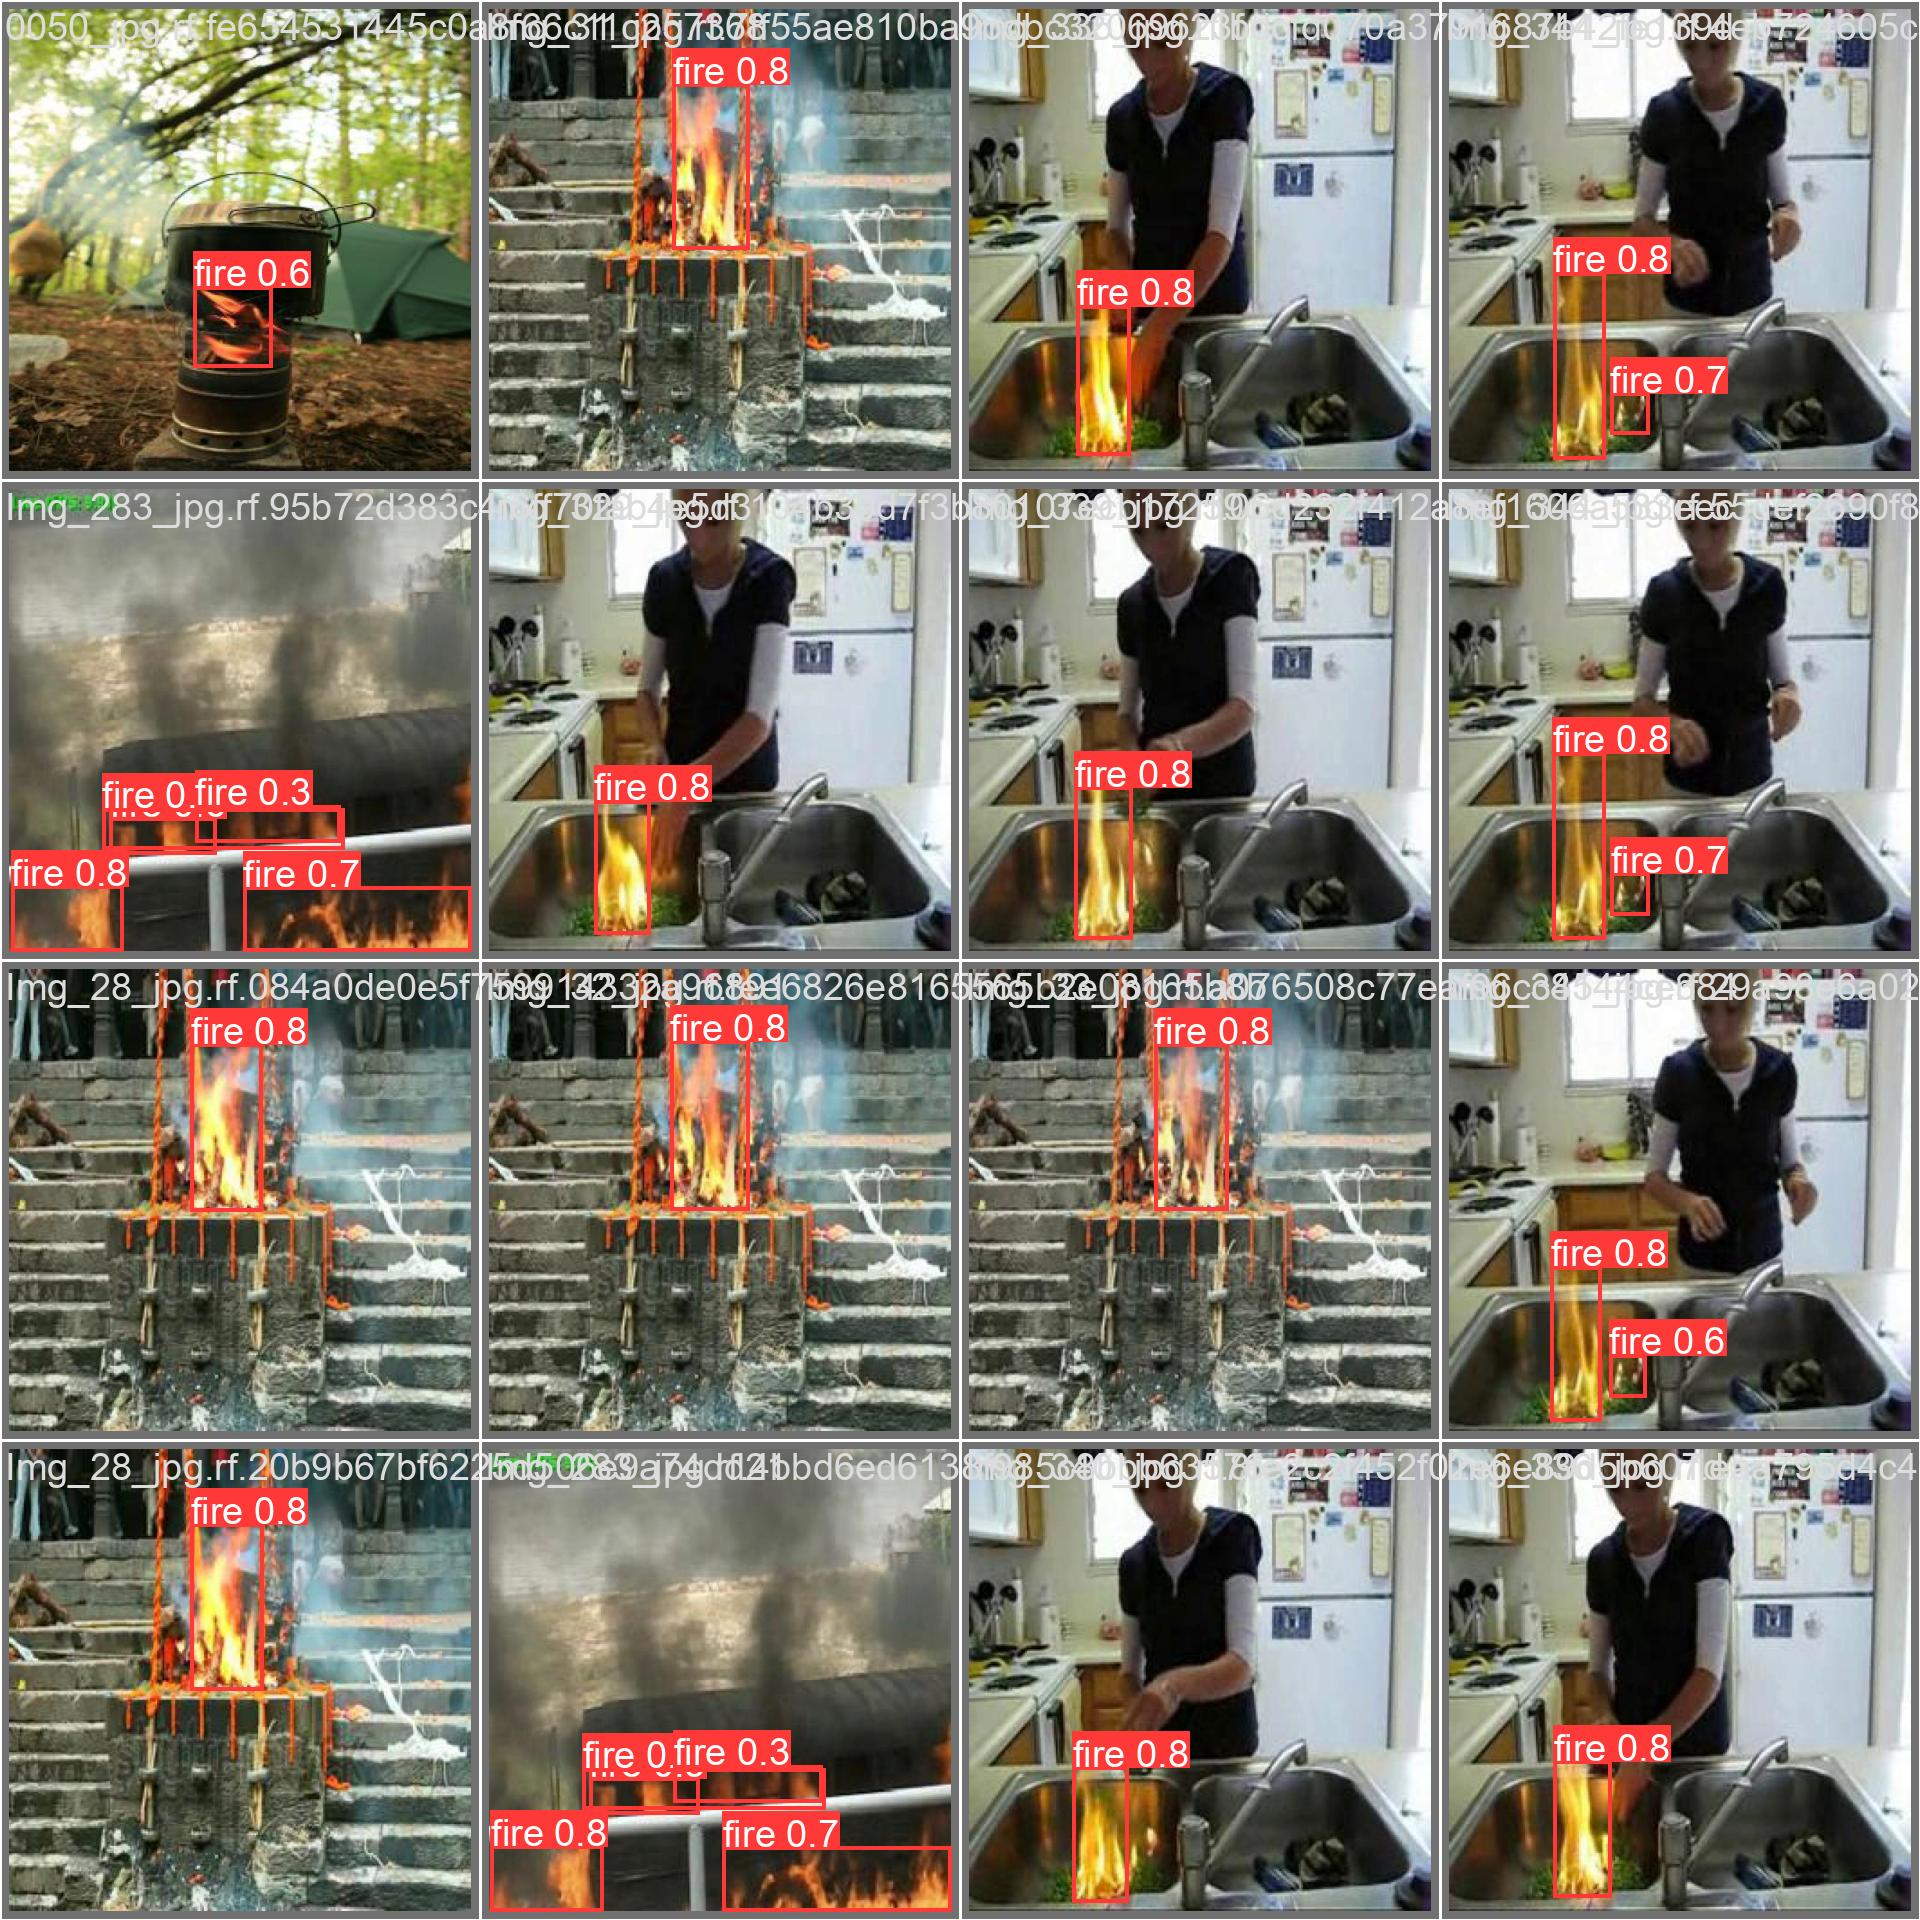

In [34]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [35]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/dataset/data.yaml'

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [36]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.25 source='/content/dataset/test/images' save=True

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


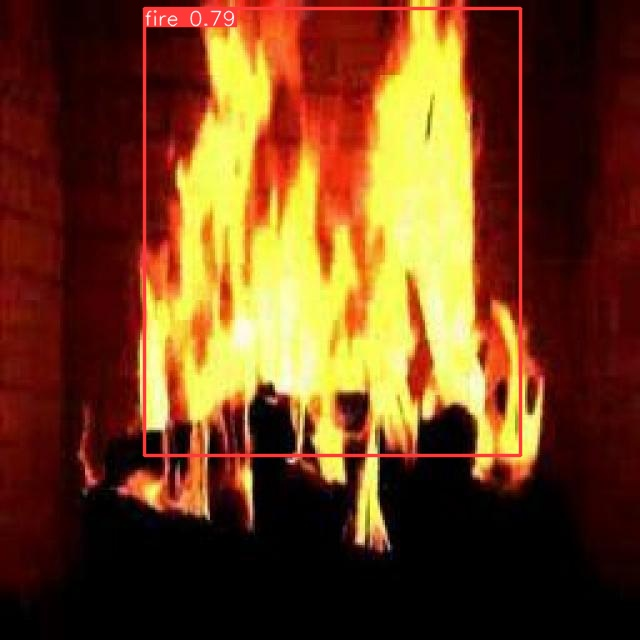

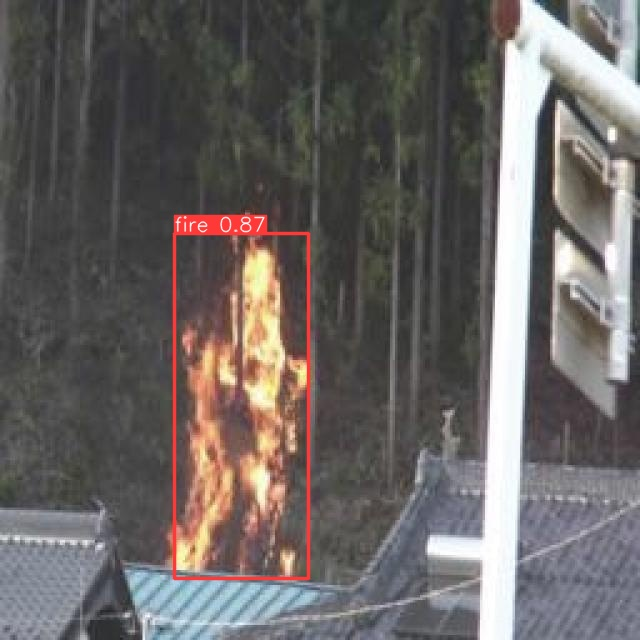

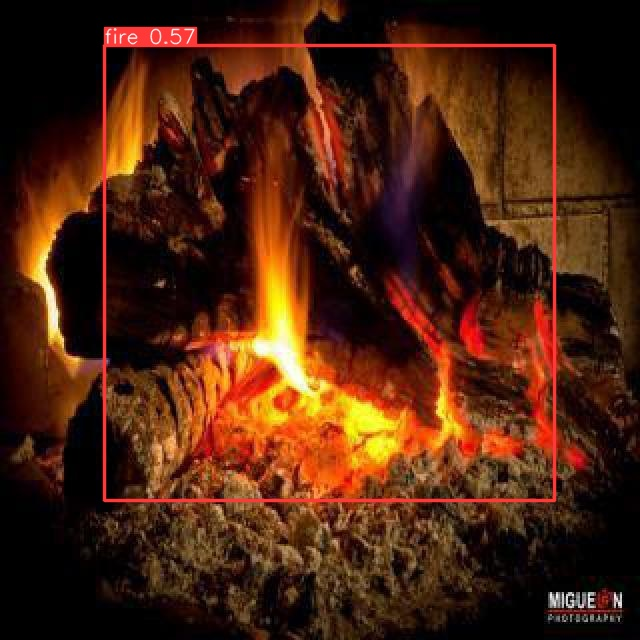

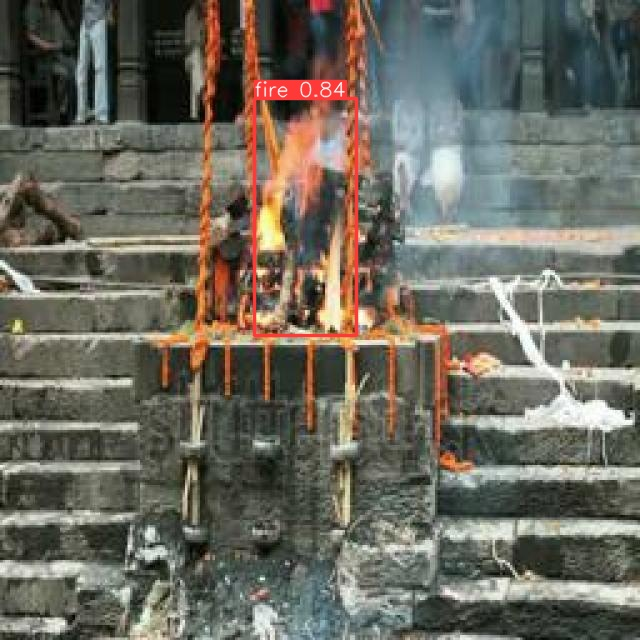

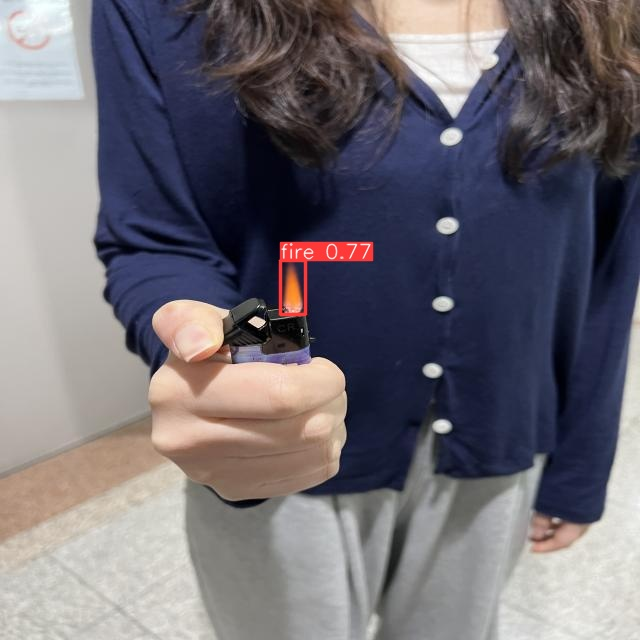

In [37]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [39]:
# prompt: zip /content/runs folder into /content/fire.zip

!zip -r /content/fire.zip /content/runs


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/Img_573_jpg.rf.7cef2058612bfb9b2d1e0ed66f98fb5c.jpg (deflated 5%)
  adding: content/runs/detect/predict/Img_1954_jpg.rf.078bbb08b4abf754e0a45eb65f16061e.jpg (deflated 5%)
  adding: content/runs/detect/predict/fire1-939-_jpg.rf.ef213317a7923bbb4fb4a3af9113b62b.jpg (deflated 5%)
  adding: content/runs/detect/predict/Img_74_jpg.rf.0d41686aea8ac1ba4e3c044a9150bbe5.jpg (deflated 5%)
  adding: content/runs/detect/predict/IMG_3659_jpeg_jpg.rf.af6c6663b3909f7b8249e264ee0a9de6.jpg (deflated 4%)
  adding: content/runs/detect/predict/IMG_3743-1-_jpeg_jpg.rf.9f958c11c4e5ab0432c80b5e67d576bc.jpg (deflated 4%)
  adding: content/runs/detect/predict/IMG_3692-1-_jpeg_jpg.rf.99c2ce43da55625f7b45e3c9672a83d9.jpg (deflated 8%)
  adding: content/runs/detect/predict/Img_1310_jpg.rf.960fbfecb5c4283afa88180ada9eaccf.jpg (deflated 4%)
  adding: 